In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler

import warnings
warnings.filterwarnings('ignore')

In [183]:
df = pd.read_csv('/content/question4-stock-data.csv')

In [184]:
df.head()

,Unnamed: 0,Date,Adj Close,Close,High,Low,Open,Volume
0,0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0


In [185]:
df.describe()

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
count,11291.000000,11198.000000,11174.000000,11196.000000,11164.000000,11188.000000,1.114600e+04
mean,5645.000000,63.609130,72.026945,72.503100,71.665079,67.999259,2.144157e+05
std,3259.575279,52.266247,51.259828,51.550735,51.011632,55.834401,3.883662e+05
min,0.000000,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00
25%,2822.500000,19.224636,27.500000,27.789255,27.536156,0.000000,1.350000e+04
50%,5645.000000,50.608900,66.035000,66.724998,65.418751,66.065002,9.032350e+04
75%,8467.500000,104.723621,114.297503,114.892500,113.639999,114.269997,2.915750e+05
max,11290.000000,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07


In [186]:
df.isnull().sum()

,0
Unnamed: 0,0
Date,110
Adj Close,93
Close,117
High,95
Low,127
Open,103
Volume,145


In [187]:
df = df[pd.notnull(df['Date'])]


In [188]:
df.isna().sum()

,0
Unnamed: 0,0
Date,0
Adj Close,93
Close,116
High,95
Low,126
Open,100
Volume,145


In [189]:
df['Adj Close'].ffill(inplace=True)
df['Close'].ffill(inplace=True)
df['High'].ffill(inplace=True)
df['Low'].ffill(inplace=True)
df['Open'].bfill(inplace=True)  # Backward fill for Open
df['Volume'].fillna(df['Volume'].median(), inplace=True)  # Median imputation for volume

df.isna().sum()

,0
Unnamed: 0,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


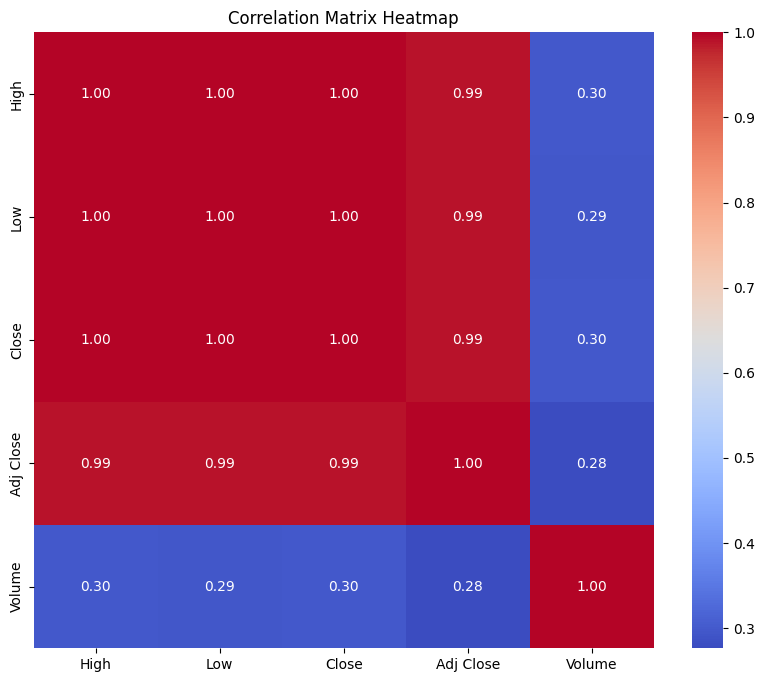

In [190]:
correlation_matrix = df[['High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [191]:
df_test = df.copy()

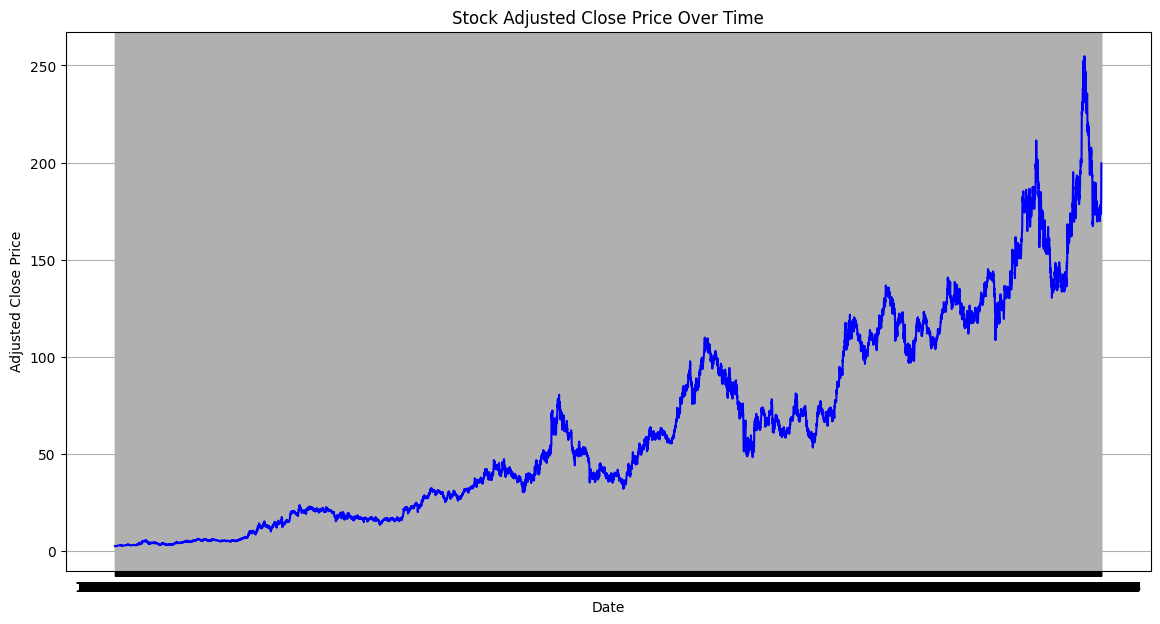

In [192]:
# Plot adjusted close price
plt.figure(figsize=(14, 7))
plt.plot(df_test['Date'], df_test['Adj Close'], color='blue')
plt.title('Stock Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid()
plt.show()

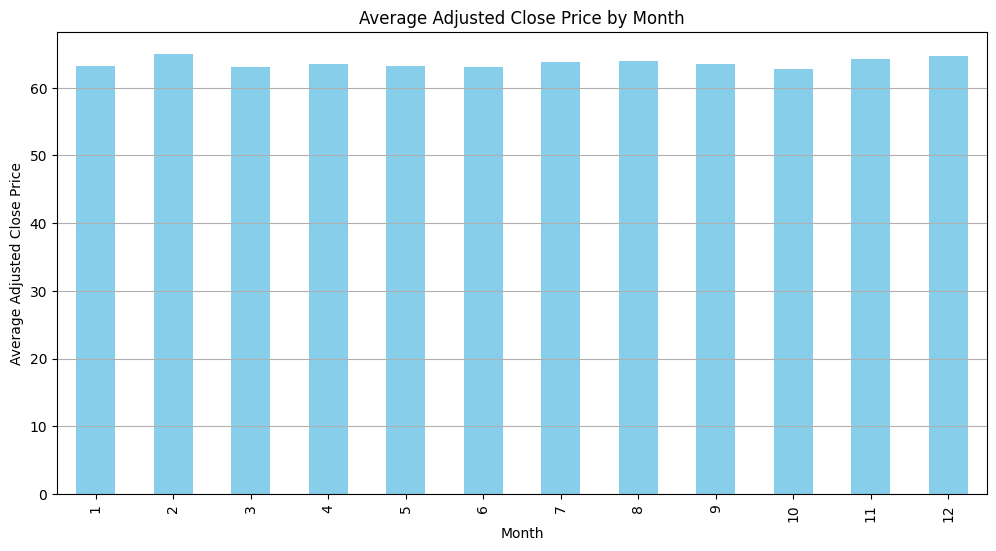

In [193]:
df_test['Date'] = pd.to_datetime(df_test['Date'])
# Extract year and month
df_test['Year'] = df_test['Date'].dt.year
df_test['Month'] = df_test['Date'].dt.month

# Monthly average
monthly_avg = df_test.groupby('Month')['Adj Close'].mean()

# Plot
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Adjusted Close Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Adjusted Close Price')
plt.grid(axis='y')
plt.show()

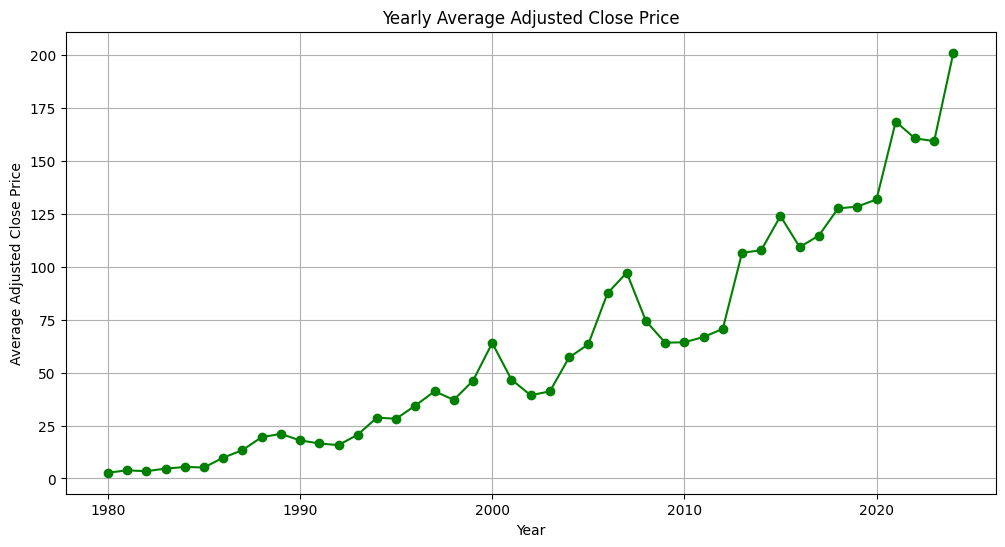

In [194]:
# Yearly average
yearly_avg = df_test.groupby('Year')['Adj Close'].mean()

# Plot
plt.figure(figsize=(12, 6))
yearly_avg.plot(kind='line', marker='o', color='green')
plt.title('Yearly Average Adjusted Close Price')
plt.xlabel('Year')
plt.ylabel('Average Adjusted Close Price')
plt.grid()
plt.show()

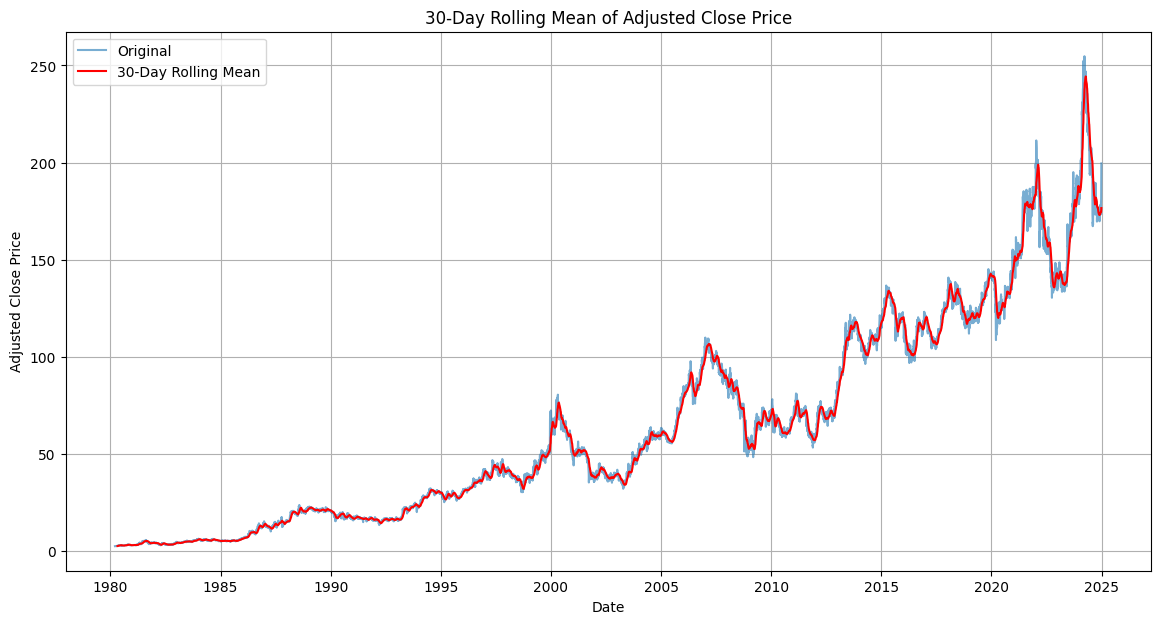

In [195]:
# Rolling mean
df_test['Rolling_Mean_30'] = df_test['Adj Close'].rolling(window=30).mean()

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df_test['Date'], df_test['Adj Close'], label='Original', alpha=0.6)
plt.plot(df_test['Date'], df_test['Rolling_Mean_30'], label='30-Day Rolling Mean', color='red')
plt.title('30-Day Rolling Mean of Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid()
plt.show()

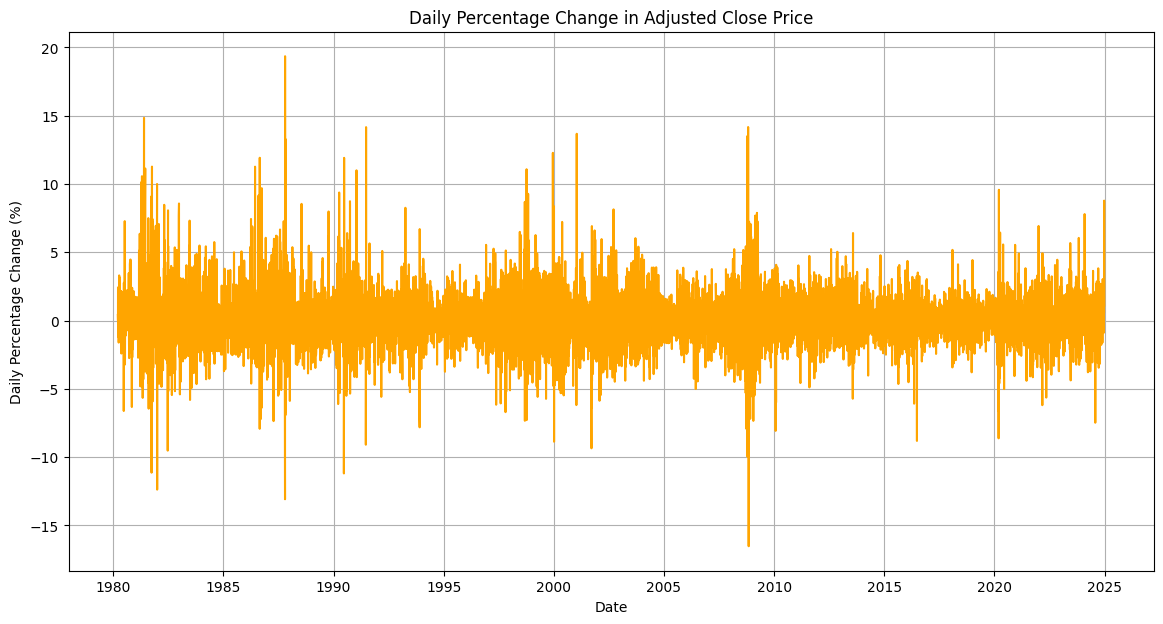

In [196]:
# Daily percentage change
df_test['Daily_Percent_Change'] = df_test['Adj Close'].pct_change() * 100

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df_test['Date'], df_test['Daily_Percent_Change'], color='orange')
plt.title('Daily Percentage Change in Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change (%)')
plt.grid()
plt.show()

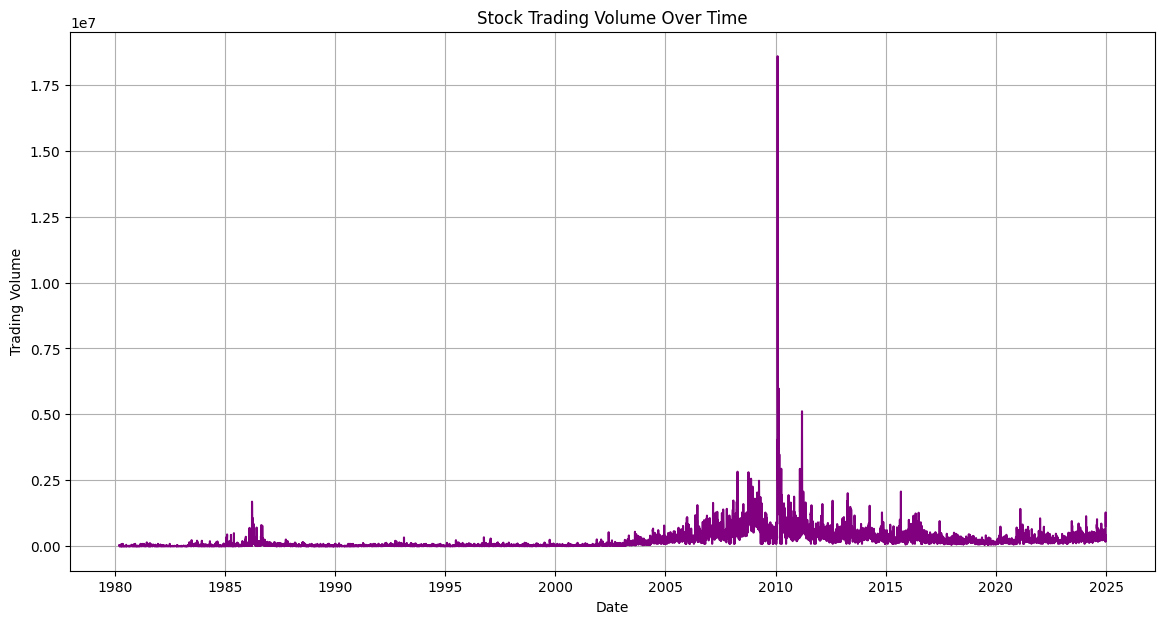

In [197]:
# Plot volume trends
plt.figure(figsize=(14, 7))
plt.plot(df_test['Date'], df_test['Volume'], color='purple')
plt.title('Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.grid()
plt.show()

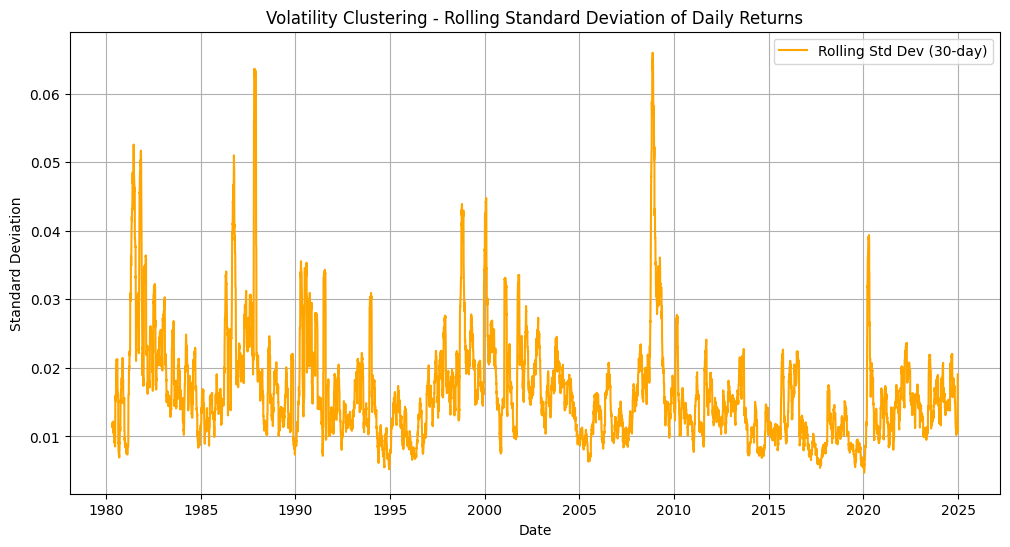

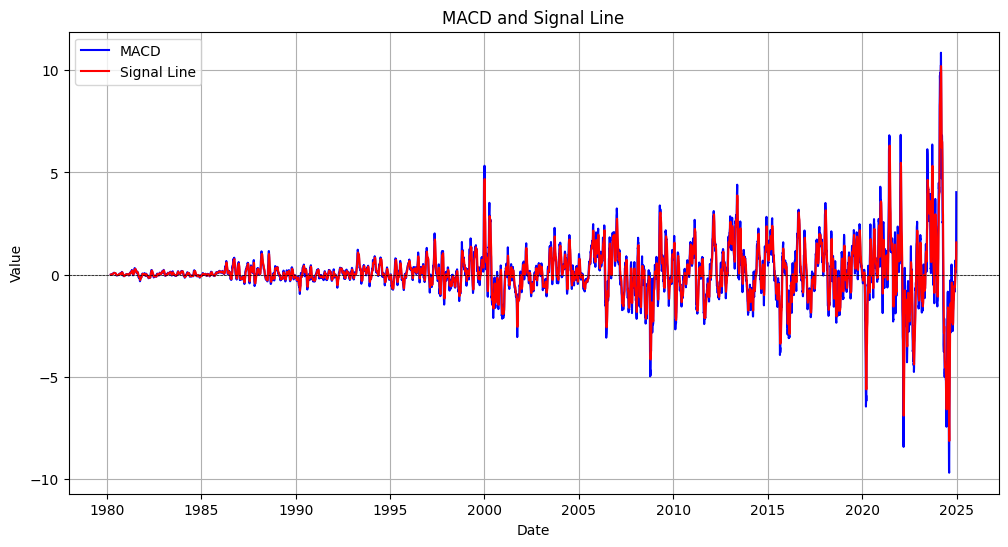

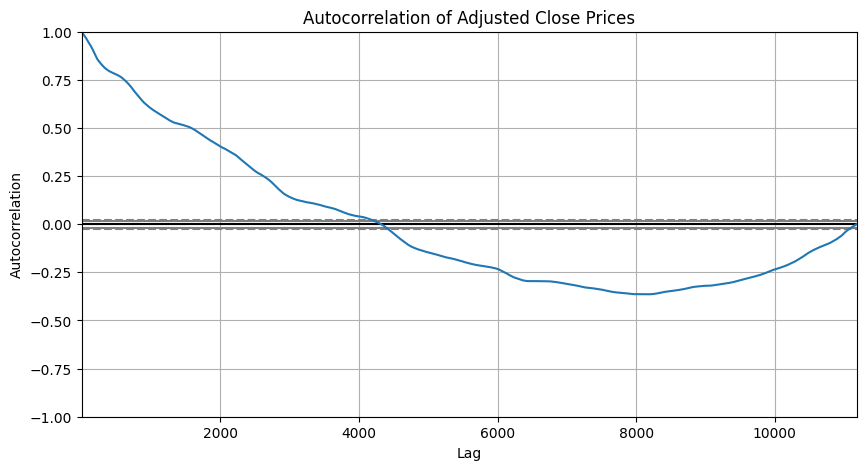

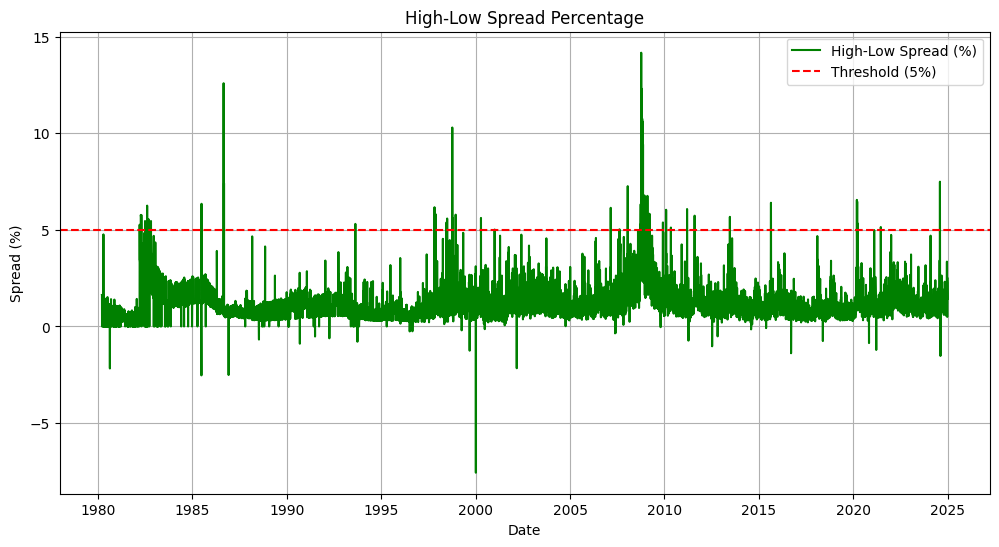

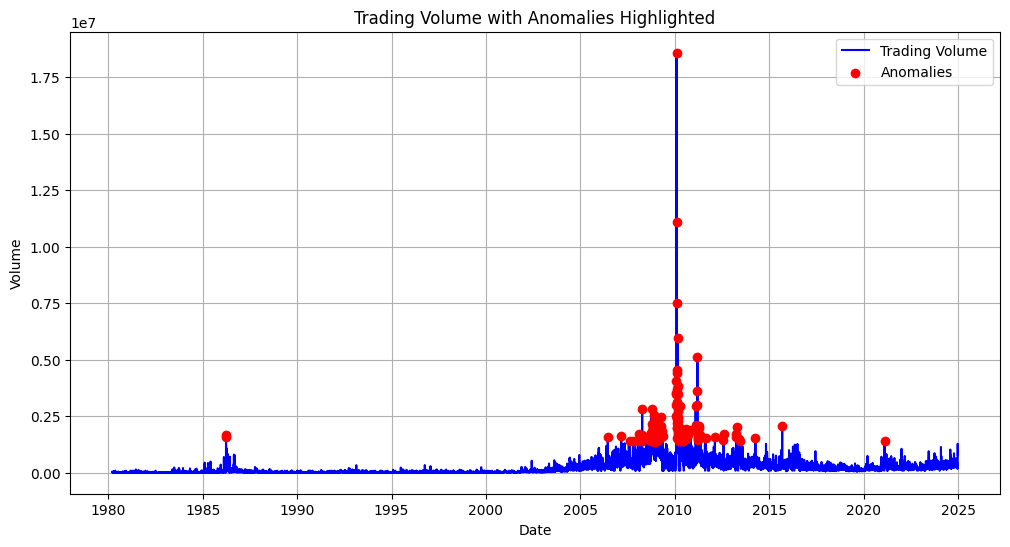

Anomalous Trading Volume Days:
            Date     Volume  Volume_Z_Score
1523  1986-03-26  1690076.0        3.818040
1524  1986-03-27  1571481.0        3.511471
6624  2006-06-14  1558900.0        3.478949
6802  2007-03-01  1642800.0        3.695831
6919  2007-08-16  1393700.0        3.051907
...          ...        ...             ...
8371  2013-05-23  1491500.0        3.304720
8381  2013-06-07  1392700.0        3.049322
8593  2014-04-10  1535400.0        3.418202
8950  2015-09-10  2073300.0        4.808676
10314 2021-02-10  1415500.0        3.108260

[132 rows x 3 columns]


In [198]:
#Volatility Clustering
# Calculate daily percentage change
df_test['Daily_Percent_Change'] = df_test['Adj Close'].pct_change()

# Rolling standard deviation (30-day window)
df_test['Rolling_Std'] = df_test['Daily_Percent_Change'].rolling(window=30).std()

# Plot rolling standard deviation
plt.figure(figsize=(12, 6))
plt.plot(df_test['Date'], df_test['Rolling_Std'], label='Rolling Std Dev (30-day)', color='orange')
plt.title('Volatility Clustering - Rolling Standard Deviation of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid()
plt.show()

# Moving Average Convergence Divergence (MACD)
# Calculate MACD and Signal Line
short_ema = df_test['Adj Close'].ewm(span=12, adjust=False).mean()
long_ema = df_test['Adj Close'].ewm(span=26, adjust=False).mean()
df_test['MACD'] = short_ema - long_ema
df_test['Signal_Line'] = df_test['MACD'].ewm(span=9, adjust=False).mean()

# Plot MACD
plt.figure(figsize=(12, 6))
plt.plot(df_test['Date'], df_test['MACD'], label='MACD', color='blue')
plt.plot(df_test['Date'], df_test['Signal_Line'], label='Signal Line', color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# Autocorrelation Analysis
from pandas.plotting import autocorrelation_plot

# Autocorrelation plot
plt.figure(figsize=(10, 5))
autocorrelation_plot(df_test['Adj Close'].dropna())
plt.title('Autocorrelation of Adjusted Close Prices')
plt.show()

# High-Low Price Spread Analysis
# Calculate price spread as a percentage of the low price
df_test['High_Low_Spread_Percent'] = ((df_test['High'] - df_test['Low']) / df['Low']) * 100

# Identify days with high spreads (greater than a chosen threshold, e.g., 5%)
high_spread_days = df_test[df_test['High_Low_Spread_Percent'] > 5]

# Plot high-low spread percentage
plt.figure(figsize=(12, 6))
plt.plot(df_test['Date'], df_test['High_Low_Spread_Percent'], label='High-Low Spread (%)', color='green')
plt.axhline(5, color='red', linestyle='--', label='Threshold (5%)')
plt.title('High-Low Spread Percentage')
plt.xlabel('Date')
plt.ylabel('Spread (%)')
plt.legend()
plt.grid()
plt.show()

# Detecting Anomalous Trading Volumes
# Calculate z-scores for trading volume
df_test['Volume_Z_Score'] = (df_test['Volume'] - df_test['Volume'].mean()) / df_test['Volume'].std()

# Identify anomalies where the z-score exceeds a chosen threshold, e.g., 3
anomalies = df_test[np.abs(df_test['Volume_Z_Score']) > 3]

# Plot trading volumes with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(df_test['Date'], df_test['Volume'], label='Trading Volume', color='blue')
plt.scatter(anomalies['Date'], anomalies['Volume'], color='red', label='Anomalies', zorder=5)
plt.title('Trading Volume with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

# Display anomaly days
print("Anomalous Trading Volume Days:")
print(anomalies[['Date', 'Volume', 'Volume_Z_Score']])




In [199]:
# Moving Averages
df['MA_7'] = df["Adj Close"].rolling(window=7).mean()
df['MA_30'] = df["Adj Close"].rolling(window=30).mean()

# Volatility (Rolling Standard Deviation)
df['Volatility_14'] = df["Adj Close"].rolling(window=14).std()

# Relative Strength Index (RSI)
delta = df["Adj Close"].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df["RSI"] = 100 - (100 / (1 + rs))

# Lagged Features (Lag 1, Lag 2, and Lag 3)
df['Adj Close_lag1'] = df["Adj Close"].shift(1)
df['Adj Close_lag2'] = df["Adj Close"].shift(2)
df['Adj Close_lag3'] = df["Adj Close"].shift(3)

# Feature Scaling (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Adj Close', 'MA_7', 'MA_30', 'Volatility_14', 'RSI', 'Adj Close_lag1', 'Adj Close_lag2', 'Adj Close_lag3']] = scaler.fit_transform(
    df[['Adj Close', 'MA_7', 'MA_30', 'Volatility_14', 'RSI', 'Adj Close_lag1', 'Adj Close_lag2', 'Adj Close_lag3']]
)


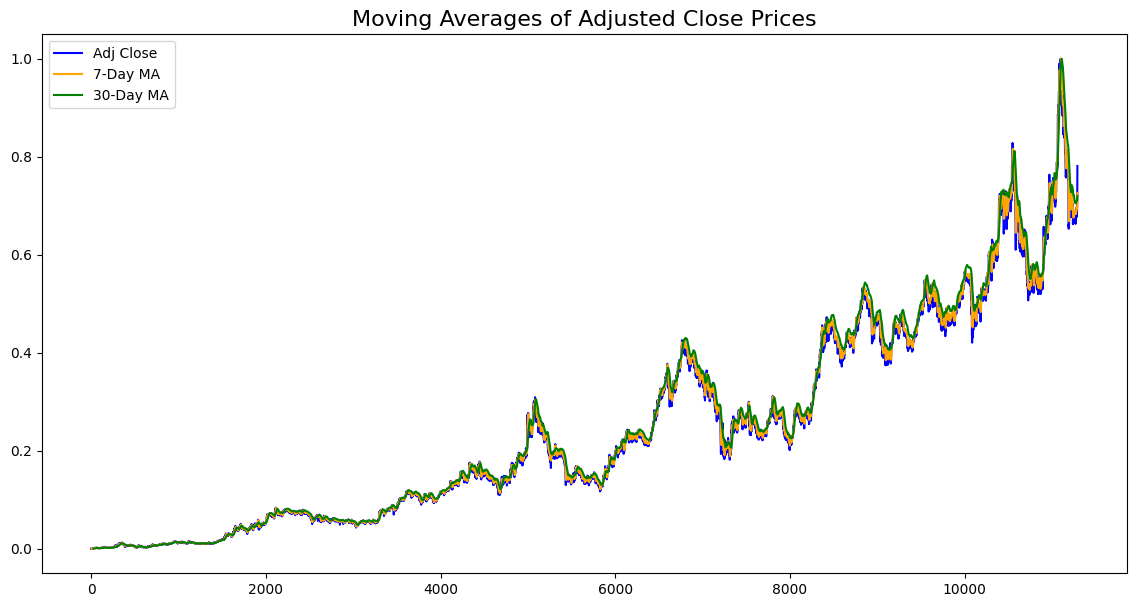

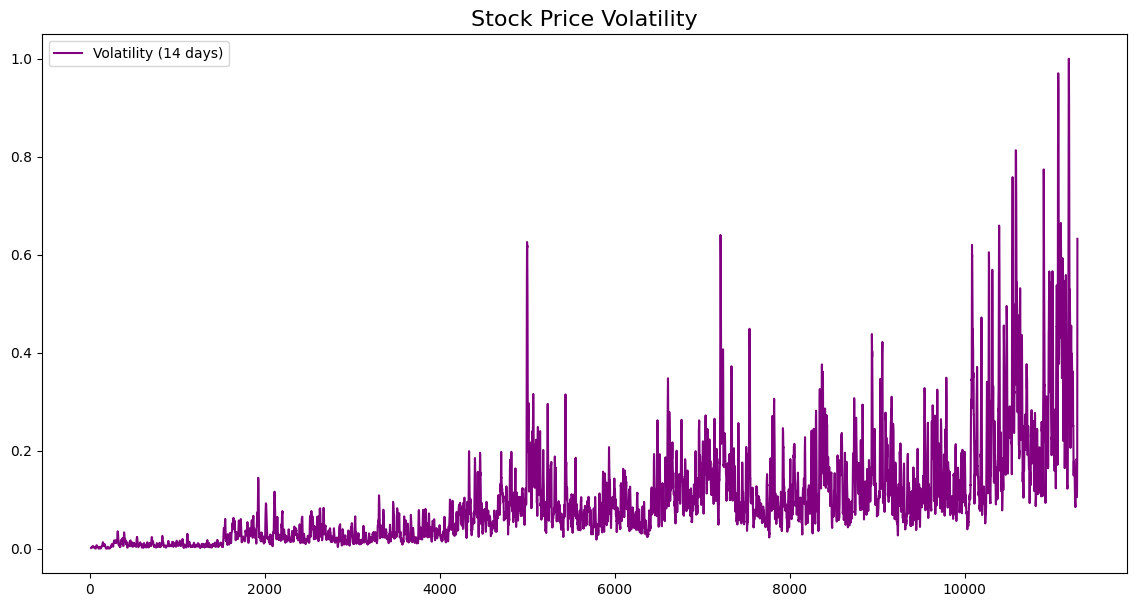

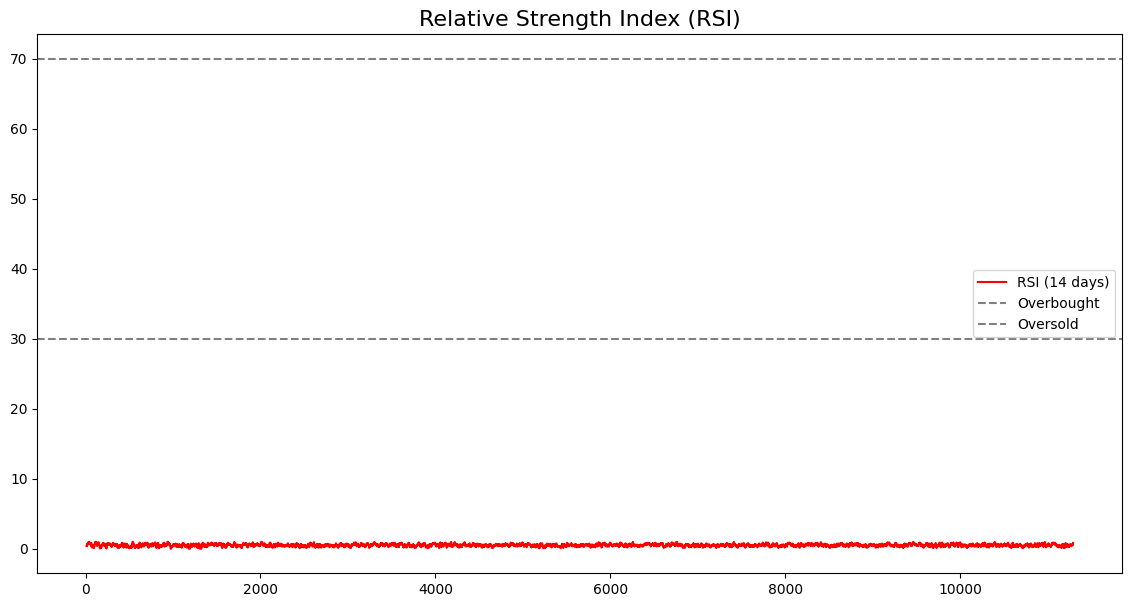

In [200]:
plt.figure(figsize=(14, 7))
plt.plot(df["Adj Close"], label="Adj Close", color="blue")
plt.plot(df["MA_7"], label="7-Day MA", color="orange")
plt.plot(df["MA_30"], label="30-Day MA", color="green")
plt.title("Moving Averages of Adjusted Close Prices", fontsize=16)
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df["Volatility_14"], label="Volatility (14 days)", color="purple")
plt.title("Stock Price Volatility", fontsize=16)
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df["RSI"], label="RSI (14 days)", color="red")
plt.axhline(70, linestyle="--", color="grey", label="Overbought")
plt.axhline(30, linestyle="--", color="grey", label="Oversold")
plt.title("Relative Strength Index (RSI)", fontsize=16)
plt.legend()
plt.show()

In [201]:

# Apply the function to your dataframe
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Convert Date Column to Numeric
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
    df['Date_numeric'] = df['Date'].map(pd.Timestamp.toordinal)  # Convert to ordinal (numeric)

# Step 3: Select Only Numerical Columns for Features
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numerical_columns].drop(columns=["Adj Close"], errors="ignore")  # Exclude the target column
y = df["Adj Close"]


In [202]:
df.isna().sum()

,0
Unnamed: 0,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0
MA_7,0
MA_30,0


In [203]:
if 'Unnamed: 0' in X.columns:
  X = X.drop(columns=['Unnamed: 0'])


In [204]:
from sklearn.model_selection import train_test_split, GridSearchCV  # Import the train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_model(y_true, y_pred, model_name="Model"):
    rmse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    return rmse, mae, r2

def plot_predictions(y_true, y_pred, model_name="Model"):
    plt.figure(figsize=(12, 6))
    plt.plot(y_true.values, label="Actual", color="blue")
    plt.plot(y_pred, label=f"{model_name} Predictions", color="orange")
    plt.title(f"{model_name} - Actual vs Predicted", fontsize=16)
    plt.legend()
    plt.show()

In [206]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, tol=1e-4),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "KNN": KNeighborsRegressor(n_neighbors=3),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Bayesian Ridge": BayesianRidge(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
}

def eval_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2

In [207]:
results = {}

for name, model in models.items():
    mse, r2 = eval_model(model, X_train, X_test, y_train, y_test)
    results[name] = {"MSE": mse, "R²": r2}

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R²", ascending=False)

results_df

,MSE,R²
Random Forest,6.918444e-06,9.998459e-01
XGBoost,9.576796e-06,9.997868e-01
Decision Tree,1.124309e-05,9.997496e-01
Polynomial Regression,3.405286e-05,9.992417e-01
Bayesian Ridge,4.375582e-05,9.990257e-01
Linear Regression,4.376048e-05,9.990256e-01
ElasticNet,7.154487e-04,9.840690e-01
KNN,3.358465e-03,9.252166e-01
SVR,1.038806e-02,7.686877e-01
MLP Regressor,1.020497e+06,-2.272354e+07


In [208]:
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring="neg_mean_squared_error", verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the optimized Random Forest model
rf_predictions_optimized = best_rf_model.predict(X_test)
evaluate_model(y_test, rf_predictions_optimized, model_name="Optimized Random Forest")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Optimized Random Forest Evaluation:
RMSE: 0.0000
MAE: 0.0012
R²: 0.9998


(6.961435068572971e-06, 0.0012329595326324569, 0.9998449888241249)

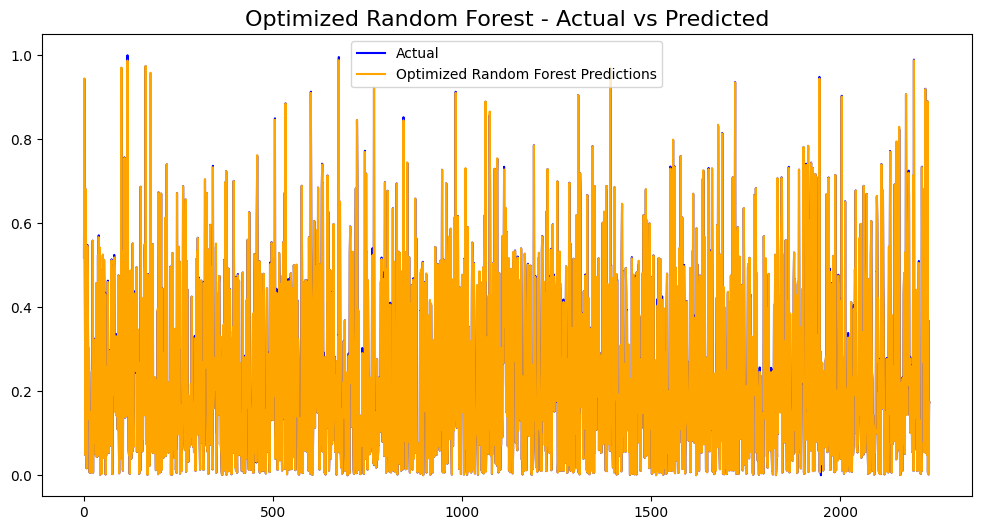

In [209]:
plot_predictions(y_test, rf_predictions_optimized, model_name="Optimized Random Forest")

Training with neurons=50, dropout_rate=0.2, learning_rate=0.001
Training with neurons=50, dropout_rate=0.2, learning_rate=0.01
Training with neurons=50, dropout_rate=0.3, learning_rate=0.001
Training with neurons=50, dropout_rate=0.3, learning_rate=0.01
Training with neurons=100, dropout_rate=0.2, learning_rate=0.001
Training with neurons=100, dropout_rate=0.2, learning_rate=0.01
Training with neurons=100, dropout_rate=0.3, learning_rate=0.001
Training with neurons=100, dropout_rate=0.3, learning_rate=0.01
Best Parameters for LSTM: {'neurons': 100, 'dropout_rate': 0.2, 'learning_rate': 0.001}
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Optimized LSTM Evaluation:
RMSE: 0.0001
MAE: 0.0083
R²: 0.9970


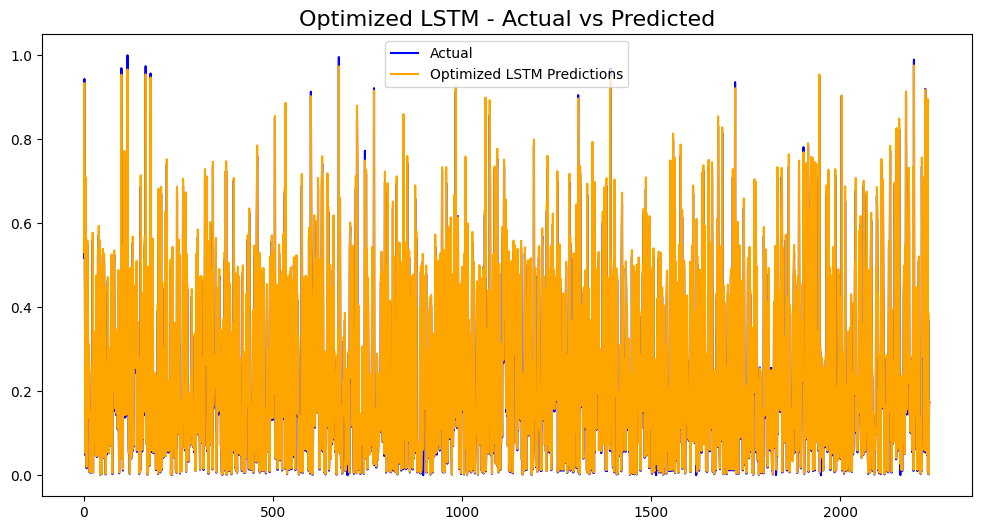

In [210]:
from tensorflow.keras.models import Sequential  # Sequential models for deep learning
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout  # Neural network layers
from tensorflow.keras.optimizers import Adam, SGD  # Optimizers for gradient descent
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler
# Step 2: Hyperparameter Tuning for LSTM
# Scale the data for LSTM
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM
X_train_lstm = np.expand_dims(X_train_scaled, axis=1)
X_test_lstm = np.expand_dims(X_test_scaled, axis=1)

def build_lstm_model(neurons=50, dropout_rate=0.2, learning_rate=0.001):
    """
    Build and compile an LSTM model with specified hyperparameters.
    """
    model = Sequential([
        LSTM(neurons, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dropout(dropout_rate),
        LSTM(neurons, return_sequences=False),
        Dropout(dropout_rate),
        Dense(1)
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="mean_squared_error")
    return model

# Define hyperparameter options
neurons_list = [50, 100]
dropout_rates = [0.2, 0.3]
learning_rates = [0.001, 0.01]

best_loss = float("inf")
best_model = None
best_params = {}

# Manual Hyperparameter Tuning
for neurons in neurons_list:
    for dropout_rate in dropout_rates:
        for learning_rate in learning_rates:
            print(f"Training with neurons={neurons}, dropout_rate={dropout_rate}, learning_rate={learning_rate}")
            lstm_model = build_lstm_model(neurons=neurons, dropout_rate=dropout_rate, learning_rate=learning_rate)
            history = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2)
            val_loss = min(history.history["val_loss"])

            if val_loss < best_loss:
                best_loss = val_loss
                best_model = lstm_model
                best_params = {
                    "neurons": neurons,
                    "dropout_rate": dropout_rate,
                    "learning_rate": learning_rate
                }

print("Best Parameters for LSTM:", best_params)

# Evaluate the optimized LSTM model
lstm_predictions_optimized = best_model.predict(X_test_lstm).flatten()
evaluate_model(y_test, lstm_predictions_optimized, model_name="Optimized LSTM")

# Step 3: Visualize Optimized Results

plot_predictions(y_test, lstm_predictions_optimized, model_name="Optimized LSTM")

In [215]:
lstm_predictions_optimized

array([0.5316319 , 0.9340179 , 0.57356405, ..., 0.00273704, 0.175617  ,
       0.174851  ], dtype=float32)

In [218]:
# Calculate directional accuracy
y_test_direction = np.diff(y_test)
y_pred_direction = np.diff(lstm_predictions_optimized.flatten())
directional_accuracy = np.mean((y_test_direction > 0) == (y_pred_direction > 0)) * 100
print(f'Directional Accuracy: {directional_accuracy}%')

Directional Accuracy: 99.10554561717353%
